In [1]:
import numpy as np
from scipy import optimize as op
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from fp_plotting_funcs import *

# from bts_phot import calibrate_fps

plt.rc('xtick', top=True, direction='in', labelsize=12)
plt.rc('ytick', right=True, direction='in', labelsize=12)
# plt.rc('font', family='Arial')

In [2]:
# READING IN THE FORCED PHOTOMETRY DATA
snztf18 = read_in_data('./forced_phot_data/ZTF18aalrxas_fp_lc.txt', data_source='ztf_fp')
sn19rwd = read_in_data('./forced_phot_data/19rwd_fp_lc.txt', data_source='ztf_fp')
sn20bio = read_in_data('./forced_phot_data/20bio_fp_lc.txt', data_source='ztf_fp')
sn20ano = read_in_data('./forced_phot_data/20ano_fp_lc.txt', data_source='ztf_fp')
sn20ikq = read_in_data('./forced_phot_data/20ikq_fp_lc.txt', data_source='ztf_fp')
sn20rsc = read_in_data('./forced_phot_data/20rsc_fp_lc.txt', data_source='ztf_fp')
sn21aezx = read_in_data('./forced_phot_data/21aezx_fp_lc.txt', data_source='ztf_fp')
sn21gno = read_in_data('./forced_phot_data/21gno_fp_lc.txt', data_source='ztf_fp')
sn21heh = read_in_data('./forced_phot_data/21heh_fp_lc.txt', data_source='ztf_fp')
sn21vgn = read_in_data('./forced_phot_data/21vgn_fp_lc.txt', data_source='ztf_fp')
sn22hnt = read_in_data('./forced_phot_data/22hnt_fp_lc.txt', data_source='ztf_fp')
sn22jpx = read_in_data('./forced_phot_data/22jpx_fp_lc.txt', data_source='ztf_fp')
sn22qzr = read_in_data('./forced_phot_data/22qzr_fp_lc.txt', data_source='ztf_fp')

snztf18.columns

/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/User

Index(['field', 'ccdid', 'qid', 'filter', 'pid', 'infobitssci', 'sciinpseeing',
       'scibckgnd', 'scisigpix', 'zpmaginpsci', 'zpmaginpsciunc',
       'zpmaginpscirms', 'clrcoeff', 'clrcoeffunc', 'ncalmatches', 'exptime',
       'adpctdif1', 'adpctdif2', 'diffmaglim', 'zpdiff', 'programid', 'jd',
       'rfid', 'forcediffimflux', 'forcediffimfluxunc', 'forcediffimsnr',
       'forcediffimchisq', 'forcediffimfluxap', 'forcediffimfluxuncap',
       'forcediffimsnrap', 'aperturecorr', 'dnearestrefsrc', 'nearestrefmag',
       'nearestrefmagunc', 'nearestrefchi', 'nearestrefsharp', 'refjdstart',
       'refjdend', 'procstatus', 'mag', 'mag_err_lower', 'mag_err_upper'],
      dtype='object')

In [3]:
#READING IN THE ALERCE ALERT DATA

#DETECTIONS
sn19rwd_a = read_in_data('./19rwd/detections.csv', data_source='alerce')
sn21gno_a = read_in_data('./21gno/detections.csv', data_source='alerce')
sn21heh_a = read_in_data('./21heh/detections.csv', data_source='alerce')
sn21vgn_a = read_in_data('./21vgn/detections.csv', data_source='alerce')
sn22hnt_a = read_in_data('./22hnt/detections.csv', data_source='alerce')
sn22jpx_a = read_in_data('./22jpx/detections.csv', data_source='alerce')

print(sn19rwd_a.columns)

#NON DETECTIONS 
sn19rwd_non = read_in_data('./19rwd/non_detections.csv', data_source='alerce')
sn21gno_non = read_in_data('./21gno/non_detections.csv', data_source='alerce')
sn21heh_non = read_in_data('./21heh/non_detections.csv', data_source='alerce')
sn21vgn_non = read_in_data('./21vgn/non_detections.csv', data_source='alerce')
sn22hnt_non = read_in_data('./22hnt/non_detections.csv', data_source='alerce')
sn22jpx_non = read_in_data('./22jpx/non_detections.csv', data_source='alerce')

print(sn19rwd_non.columns)

Index(['jd', 'tid', 'mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos',
       'nid', 'distnr', 'magpsf', 'magpsf_corr', 'magpsf_corr_ext', 'magap',
       'magap_corr', 'sigmapsf', 'sigmapsf_corr', 'sigmapsf_corr_ext',
       'sigmagap', 'sigmagap_corr', 'ra', 'dec', 'rb', 'rbversion', 'drb',
       'magapbig', 'sigmagapbig', 'rfid', 'has_stamp', 'corrected', 'dubious',
       'candid_alert', 'step_id_corr', 'phase', 'parent_candid'],
      dtype='object')
Index(['jd', 'tid', 'mjd', 'fid', 'diffmaglim'], dtype='object')


In [4]:
# READING IN THE ASAS-SN DATA
snztf18_as = read_in_data('./forced_phot_data/snztf18_asassn.csv', data_source='asassn')
sn19rwd_as = read_in_data('./forced_phot_data/sn19rwd_asassn.csv', data_source='asassn')
sn20bio_as = read_in_data('./forced_phot_data/sn20bio_asassn.csv', data_source='asassn')
sn20ano_as = read_in_data('./forced_phot_data/sn20ano_asassn.csv', data_source='asassn')
sn20ikq_as = read_in_data('./forced_phot_data/sn20ikq_asassn.csv', data_source='asassn')
sn20rsc_as = read_in_data('./forced_phot_data/sn20rsc_asassn.csv', data_source='asassn')
sn21aezx_as = read_in_data('./forced_phot_data/sn21aezx_asassn.csv', data_source='asassn')
sn21gno_as = read_in_data('./forced_phot_data/sn21gno_asassn.csv', data_source='asassn')
sn21heh_as = read_in_data('./forced_phot_data/sn21heh_asassn.csv', data_source='asassn')
sn21vgn_as = read_in_data('./forced_phot_data/sn21vgn_asassn.csv', data_source='asassn')
sn22hnt_as = read_in_data('./forced_phot_data/sn22hnt_asassn.csv', data_source='asassn')
sn22jpx_as = read_in_data('./forced_phot_data/sn22jpx_asassn.csv', data_source='asassn')
sn22qzr_as = read_in_data('./forced_phot_data/sn22qzr_asassn.csv', data_source='asassn')

sn22qzr_as.columns

Index(['HJD', 'UT Date', 'Camera', 'FWHM', 'Limit', 'mag', 'mag_err',
       'flux(mJy)', 'flux_err', 'Filter'],
      dtype='object')

In [5]:
# READING IN THE ATLAS DATA 
snztf18_at = read_in_data('./forced_phot_data/snztf18_atlas.txt', data_source='atlas')
sn19rwd_at = read_in_data('./forced_phot_data/sn19rwd_atlas.txt', data_source='atlas')
sn20bio_at = read_in_data('./forced_phot_data/sn20bio_atlas.txt', data_source='atlas')
sn20ano_at = read_in_data('./forced_phot_data/sn20ano_atlas.txt', data_source='atlas')
sn20ikq_at = read_in_data('./forced_phot_data/sn20ikq_atlas.txt', data_source='atlas')
sn20rsc_at = read_in_data('./forced_phot_data/sn20rsc_atlas.txt', data_source='atlas')
sn21aezx_at = read_in_data('./forced_phot_data/sn21aezx_atlas.txt', data_source='atlas')
sn21gno_at = read_in_data('./forced_phot_data/sn21gno_atlas.txt', data_source='atlas')
sn21heh_at = read_in_data('./forced_phot_data/sn21heh_atlas.txt', data_source='atlas')
sn21vgn_at = read_in_data('./forced_phot_data/sn21vgn_atlas.txt', data_source='atlas')
sn22hnt_at = read_in_data('./forced_phot_data/sn22hnt_atlas.txt', data_source='atlas')
sn22jpx_at = read_in_data('./forced_phot_data/sn22jpx_atlas.txt', data_source='atlas')
sn22qzr_at = read_in_data('./forced_phot_data/sn22qzr_atlas.txt', data_source='atlas')

sn22qzr_at.columns

Index(['JD', 'MJD', 'm', 'dm', 'uJy', 'duJy', 'F', 'err', 'chi/N', 'RA', 'Dec',
       'x', 'y', 'maj', 'min', 'phi', 'apfit', 'mag5sig', 'Sky', 'Obs'],
      dtype='object')

In [6]:
fp_list = [snztf18, sn19rwd, sn20bio, sn20ano, sn20ikq, sn20rsc, sn21aezx, sn21gno, sn21heh, sn21vgn, sn22hnt, sn22jpx, sn22qzr]
at_list = [snztf18_at, sn19rwd_at, sn20bio_at, sn20ano_at, sn20ikq_at, sn20rsc_at, sn21aezx_at, sn21gno_at, sn21heh_at, sn21vgn_at, sn22hnt_at, sn22jpx_at, sn22qzr_at]
as_list = [snztf18_as, sn19rwd_as, sn20bio_as, sn20ano_as, sn20ikq_as, sn20rsc_as, sn21aezx_as, sn21gno_as, sn21heh_as, sn21vgn_as, sn22hnt_as, sn22jpx_as, sn22qzr_as]

In [7]:
# def slice_flux_df(df,xlims=[0,0]):
#     low,high = xlims[0],xlims[1]
#     return df[(low<=df['jd']) & (df['jd']<=high)].reset_index(drop=True)

# slice_snztf18 = slice_flux_df(snztf18, [13+2.4582e6, 60+2.4582e6])
# slice_sn19rwd = slice_flux_df(sn19rwd, [750+2.458e6, 810+2.458e6])
# slice_sn21vgn = slice_flux_df(sn21vgn, [25+2.4594e6, 75+2.4594e6])

# slice_snztf18.to_csv('./forced_phot_data/subselected_dfs/snztf18_flux.csv',index=False)
# slice_sn19rwd.to_csv('./forced_phot_data/subselected_dfs/sn19rwd_flux.csv',index=False)
# slice_sn21vgn.to_csv('./forced_phot_data/subselected_dfs/sn21vgn_flux.csv',index=False)

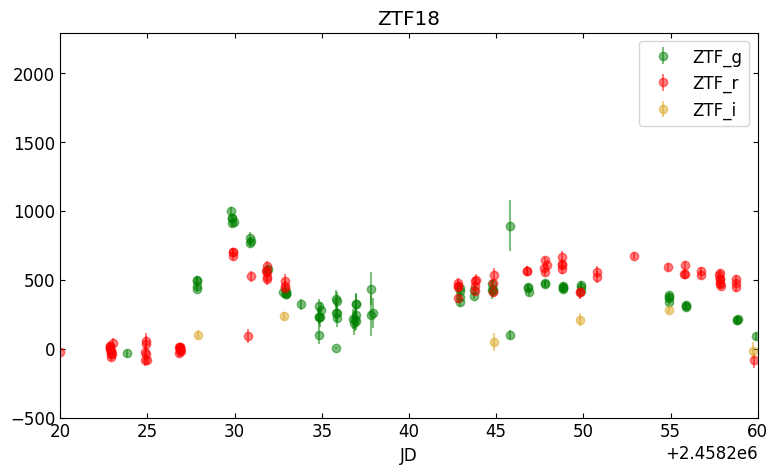

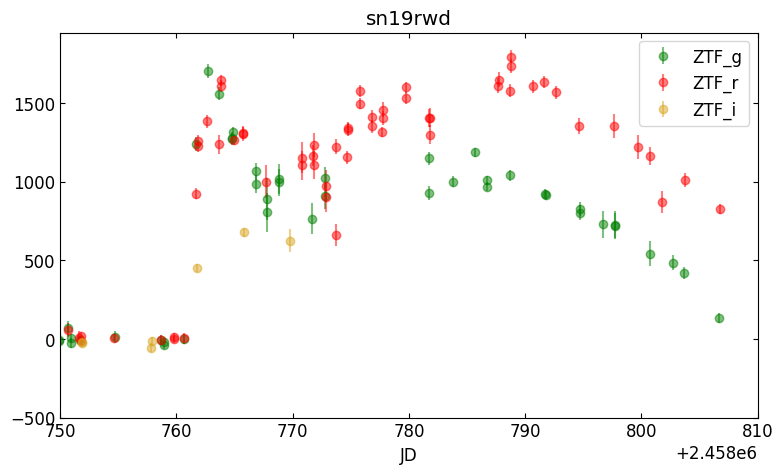

/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/pnr5sh/miniconda3/envs/astro/lib/python3.11/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


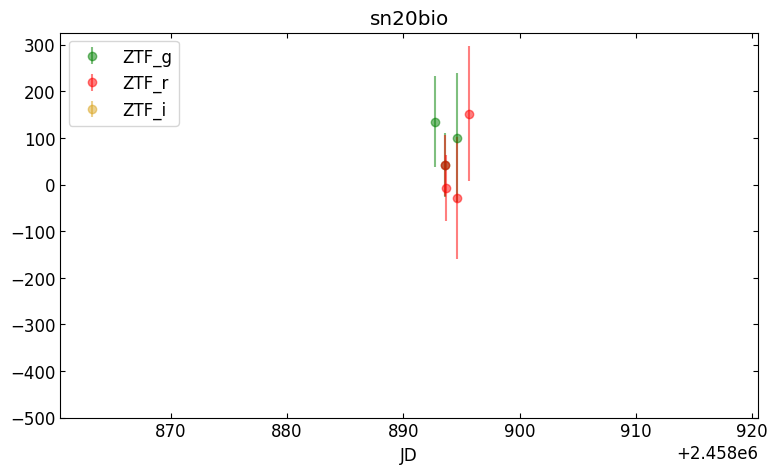

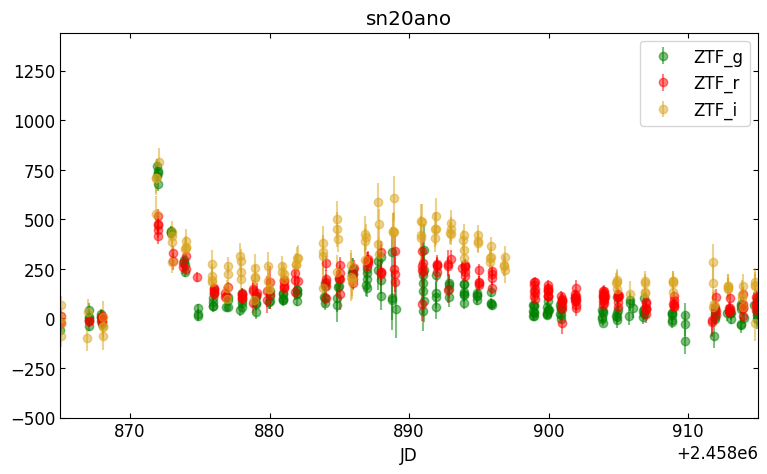

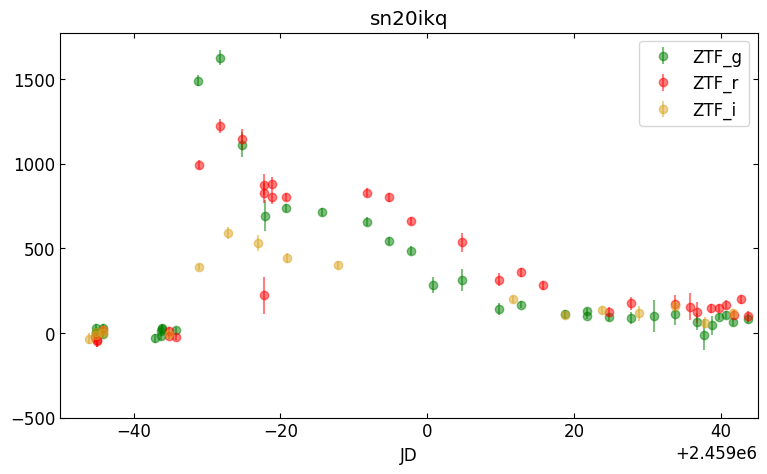

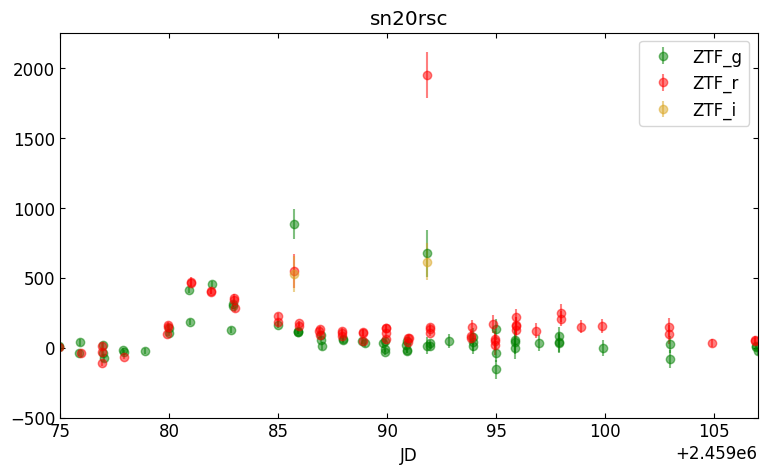

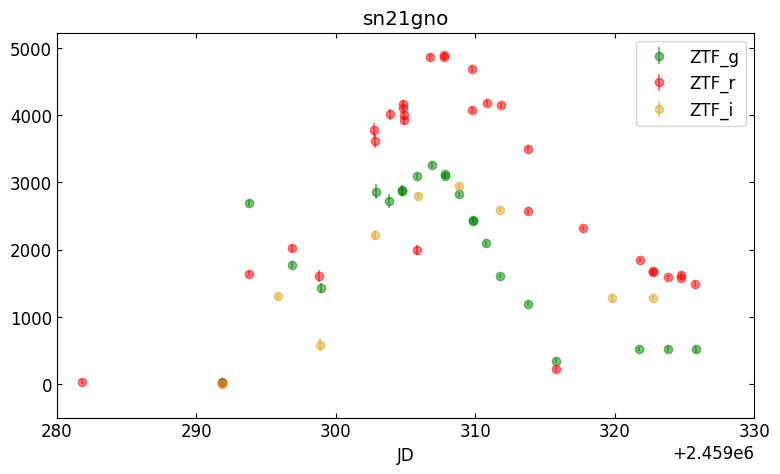

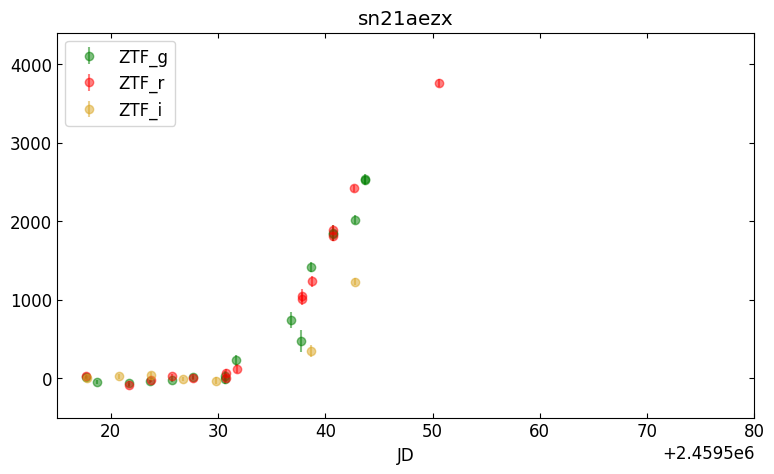

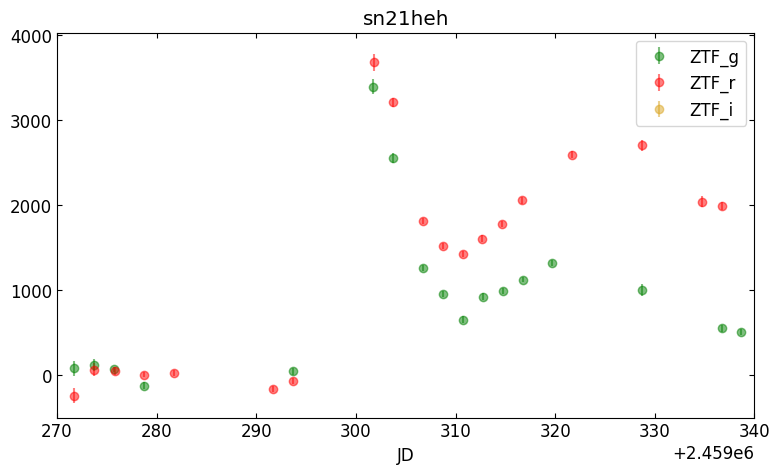

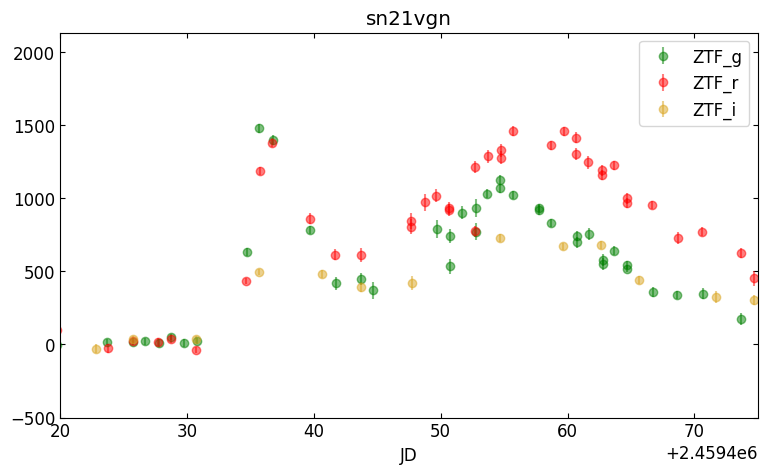

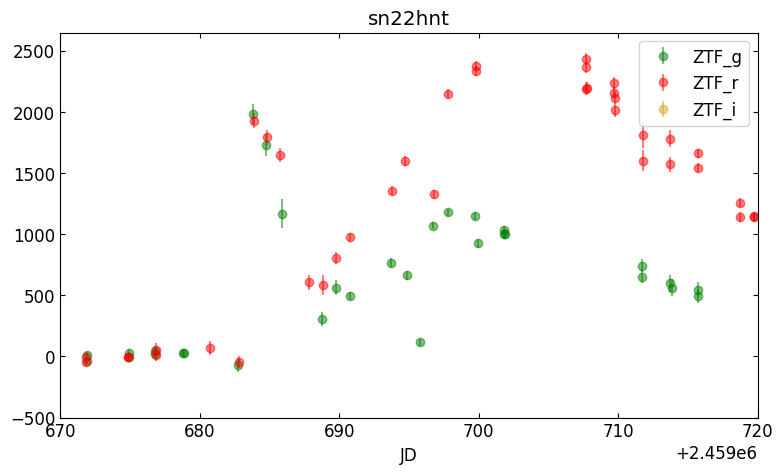

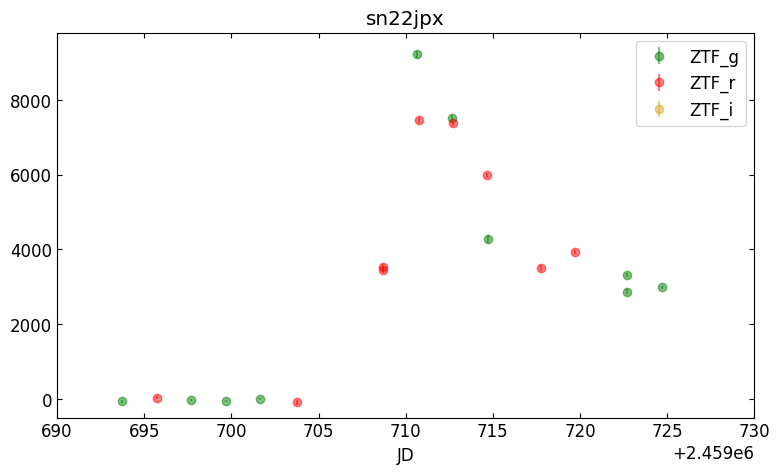

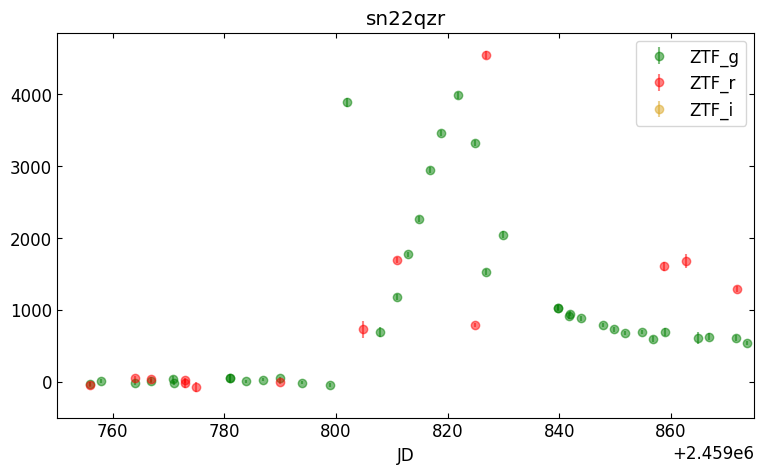

In [8]:
# PLOTTING THE FLUX
# %matplotlib qt
%matplotlib inline

#plotting the fluxes
plot_LC(snztf18, col1='forcediffimflux', err='forcediffimfluxunc',ID='ZTF18', xlimit=True, xlims=[20+2.4582e6, 60+2.4582e6])
plot_LC(sn19rwd, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn19rwd', xlimit=True, xlims=[750+2.458e6, 810+2.458e6])
plot_LC(sn20bio, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20bio', xlimit=True, xlims=[2458860.5, 2458920.5])
plot_LC(sn20ano, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20ano', xlimit=True, xlims=[865+2.458e6, 915+2.458e6])
plot_LC(sn20ikq, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20ikq', xlimit=True, xlims=[-50+2.459e6, 45+2.459e6])
plot_LC(sn20rsc, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn20rsc', xlimit=True, xlims=[75+2.459e6, 107+2.459e6])
plot_LC(sn21gno, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21gno', xlimit=True, xlims=[280+2.459e6, 330+2.459e6])
plot_LC(sn21aezx, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21aezx', xlimit=True, xlims=[15+2.4595e6, 80+2.4595e6])
plot_LC(sn21heh, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21heh', xlimit=True, xlims=[270+2.459e6, 340+2.459e6])
plot_LC(sn21vgn, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn21vgn', xlimit=True, xlims=[20+2.4594e6,75+2.4594e6])
plot_LC(sn22hnt, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22hnt', xlimit=True, xlims=[670+2.459e6, 720+2.459e6])
plot_LC(sn22jpx, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22jpx', xlimit=True, xlims=[690+2.459e6, 730+2.459e6])
plot_LC(sn22qzr, col1='forcediffimflux', err='forcediffimfluxunc',ID='sn22qzr', xlimit=True, xlims=[750+2.459e6, 875+2.459e6])

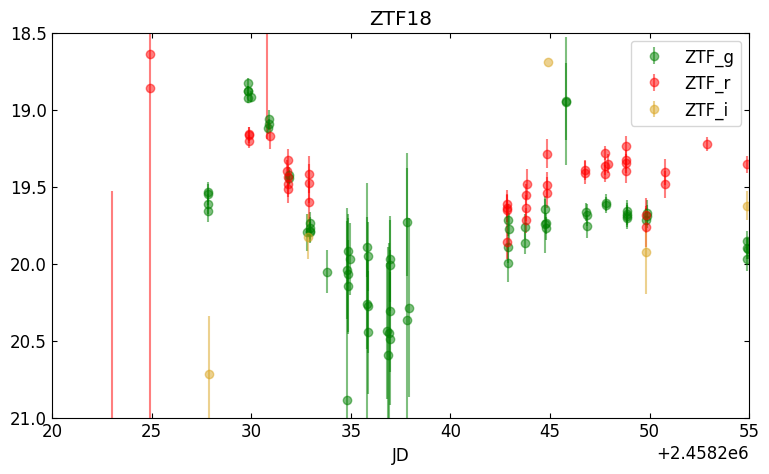

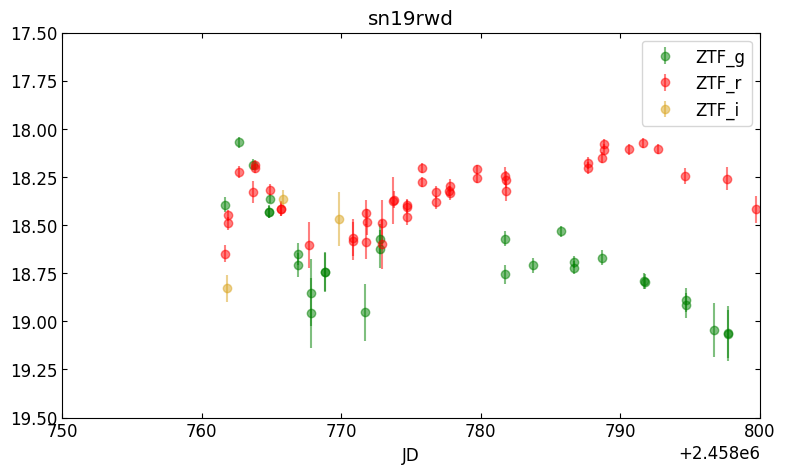

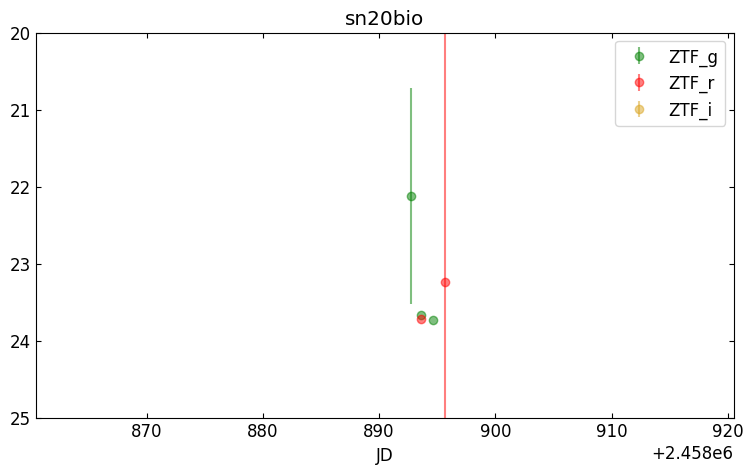

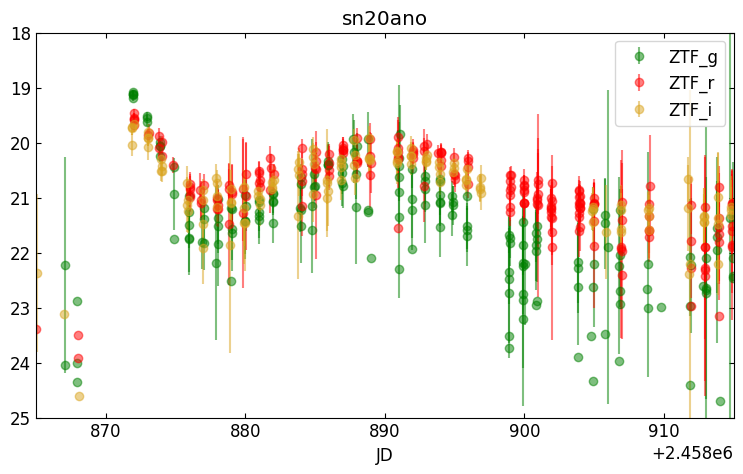

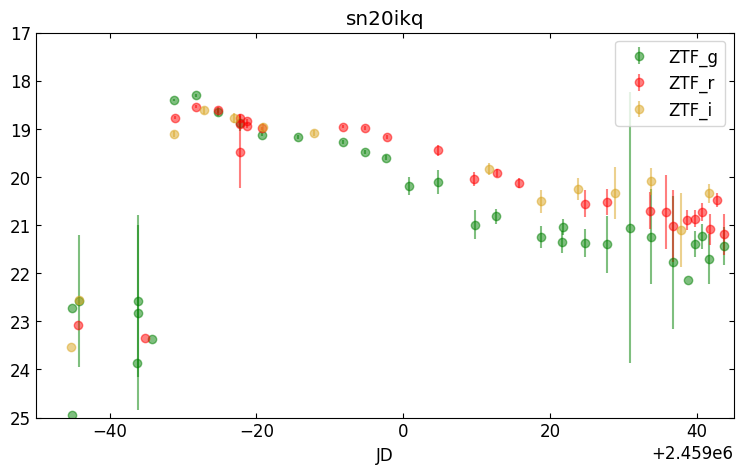

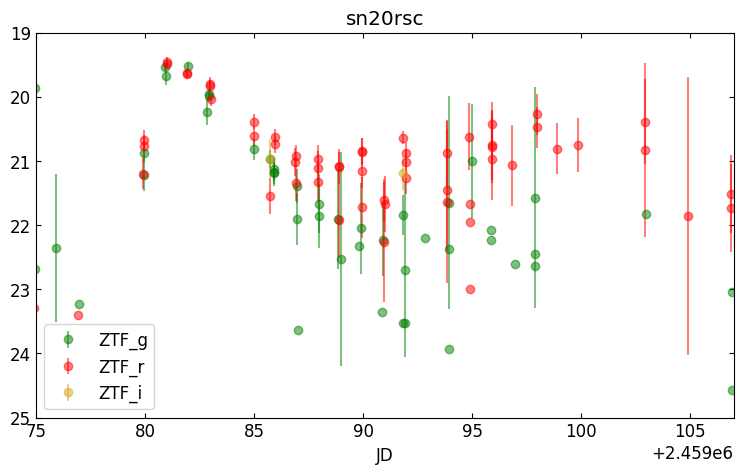

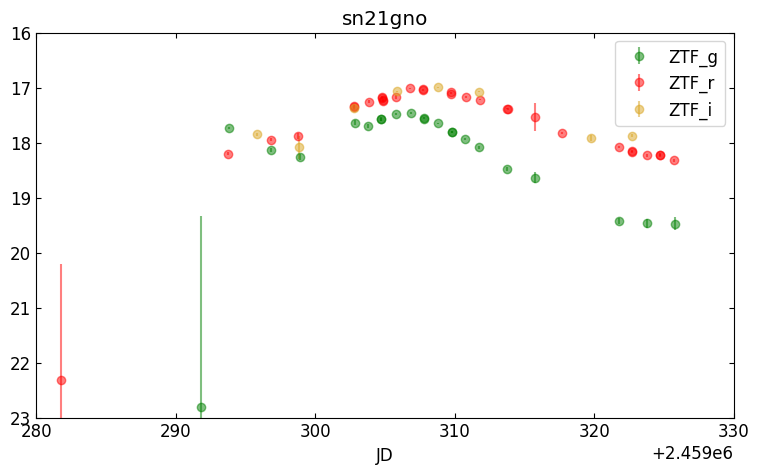

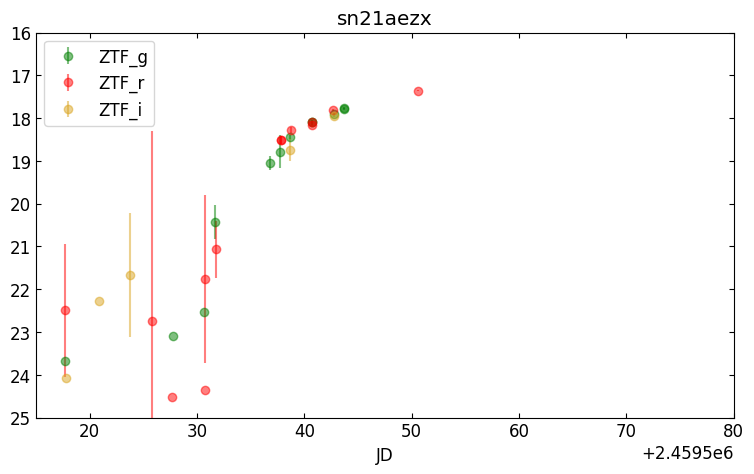

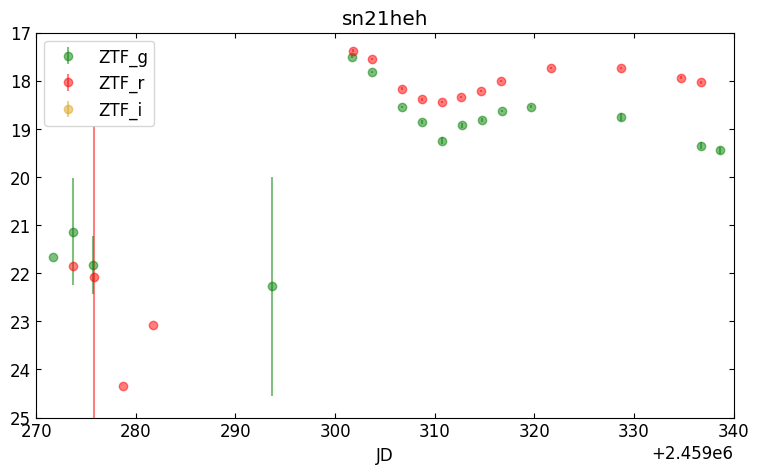

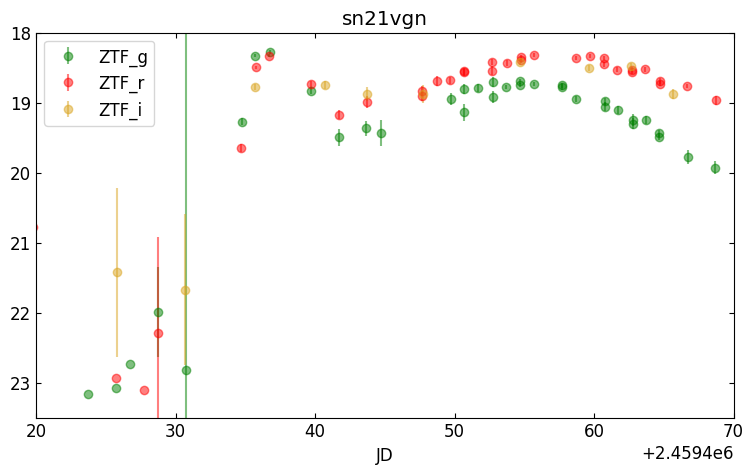

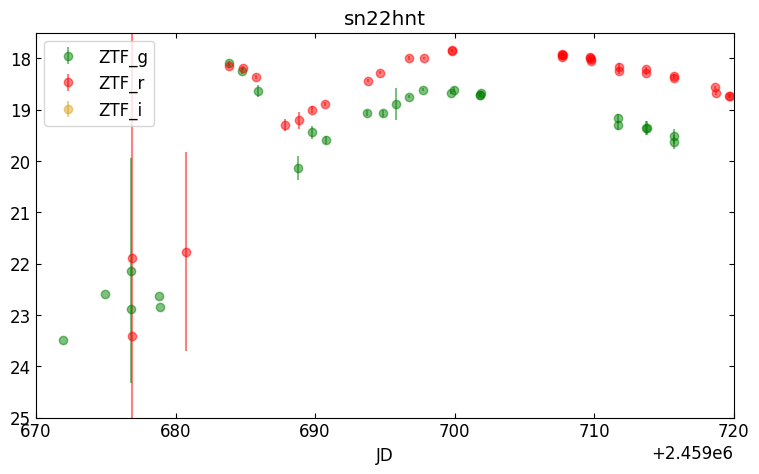

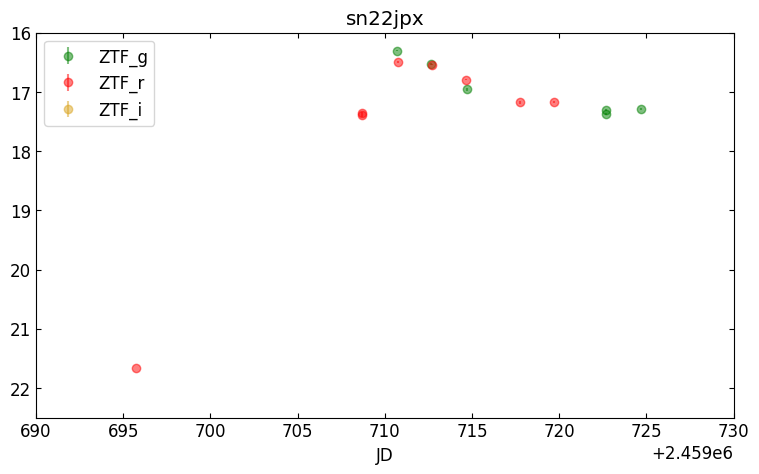

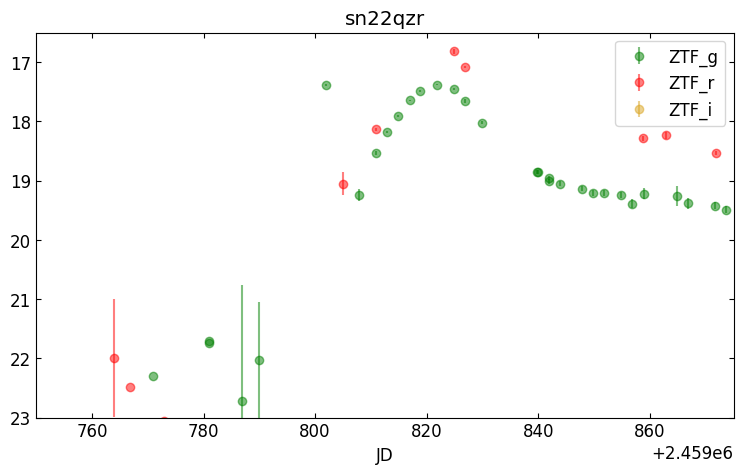

In [9]:
# PLOTTING THE MAG

# %matplotlib qt
%matplotlib inline

## plotting the magnitudes
plot_LC(snztf18, col1='mag', err=_, ID='ZTF18', xlimit=True, xlims=[20+2.4582e6, 55+2.4582e6], ylims=[21.0, 18.5], flux=False)
plot_LC(sn19rwd, col1='mag', err=_,ID='sn19rwd', xlimit=True, xlims=[750+2.458e6, 800+2.458e6], ylims=[19.5, 17.5], flux=False)
plot_LC(sn20bio, col1='mag', err=_,ID='sn20bio', xlimit=True, xlims=[2458860.5, 2458920.5], ylims=[25, 20], flux=False)
plot_LC(sn20ano, col1='mag', err=_,ID='sn20ano', xlimit=True, xlims=[865+2.458e6, 915+2.458e6], ylims=[25,18], flux=False)
plot_LC(sn20ikq, col1='mag', err=_,ID='sn20ikq', xlimit=True, xlims=[-50+2.459e6, 45+2.459e6], ylims=[25,17], flux=False)
plot_LC(sn20rsc, col1='mag', err=_,ID='sn20rsc', xlimit=True, xlims=[75+2.459e6, 107+2.459e6], ylims=[25,19], flux=False)
plot_LC(sn21gno, col1='mag', err=_, ID='sn21gno', xlimit=True, xlims=[280+2.459e6, 330+2.459e6], ylims=[23, 16], flux=False)
plot_LC(sn21aezx, col1='mag', err=_, ID='sn21aezx', xlimit=True, xlims=[15+2.4595e6, 80+2.4595e6], ylims=[25, 16], flux=False)
plot_LC(sn21heh, col1='mag', err=_, ID='sn21heh', xlimit=True, xlims=[270+2.459e6, 340+2.459e6], ylims=[25, 17], flux=False)
plot_LC(sn21vgn, col1='mag', err=_, ID='sn21vgn', xlimit=True, xlims=[20+2.4594e6,70+2.4594e6], ylims=[23.5, 18], flux=False)
plot_LC(sn22hnt, col1='mag', err=_, ID='sn22hnt', xlimit=True, xlims=[670+2.459e6, 720+2.459e6], ylims=[25, 17.5], flux=False)
plot_LC(sn22jpx, col1='mag', err=_, ID='sn22jpx', xlimit=True, xlims=[690+2.459e6, 730+2.459e6], ylims=[22.5, 16.0], flux=False)
plot_LC(sn22qzr, col1='mag', err=_, ID='sn22qzr', xlimit=True, xlims=[750+2.459e6, 875+2.459e6], ylims=[23.0, 16.5], flux=False)

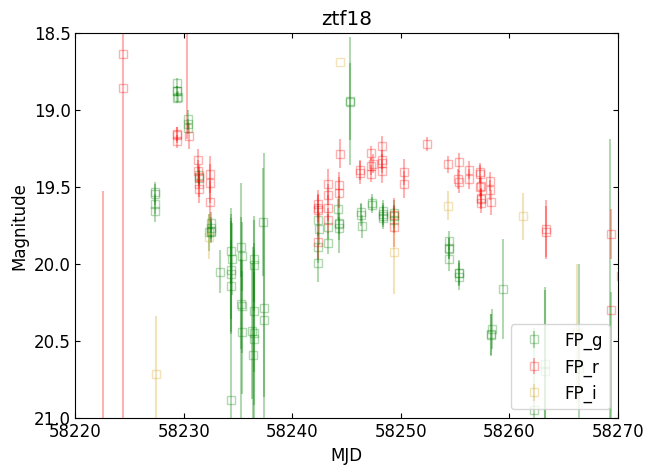

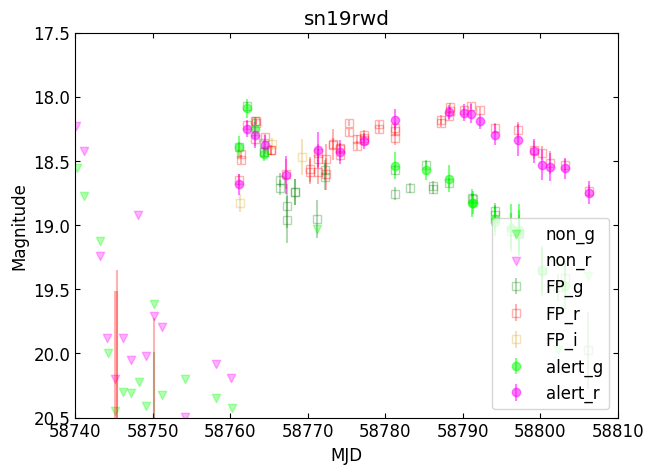

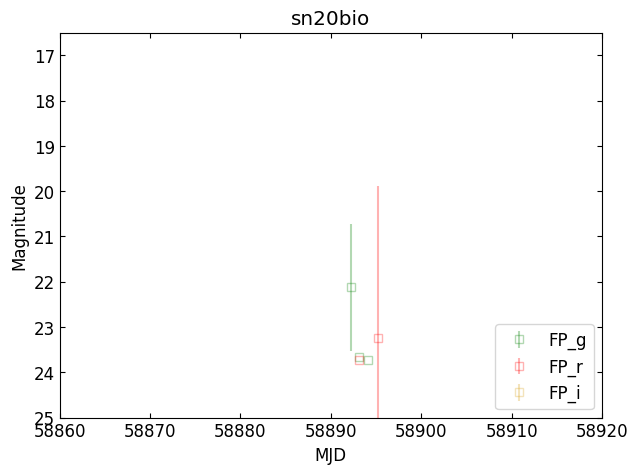

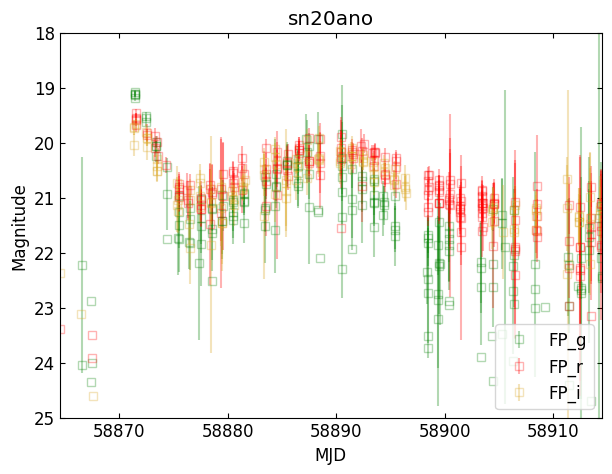

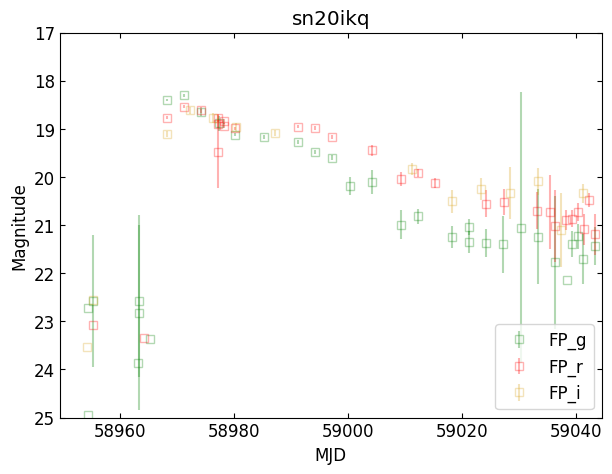

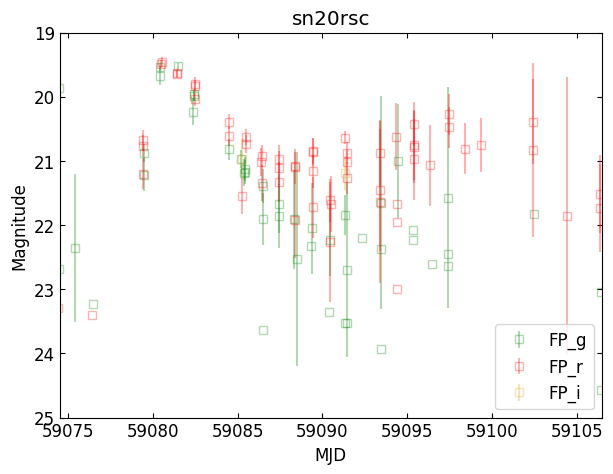

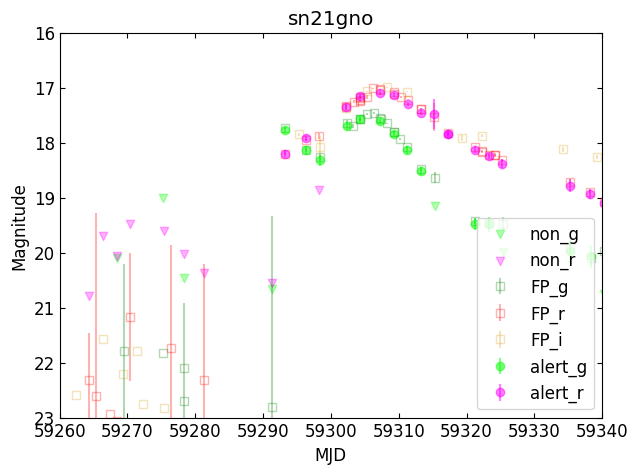

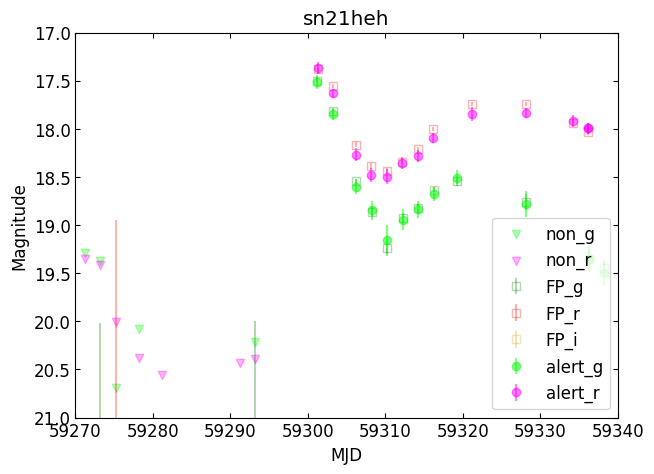

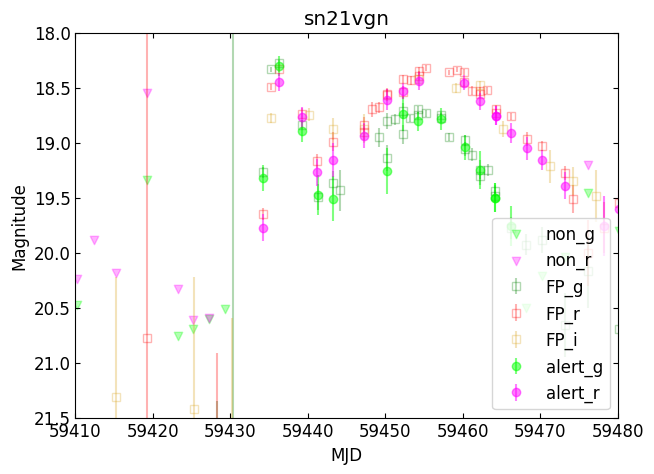

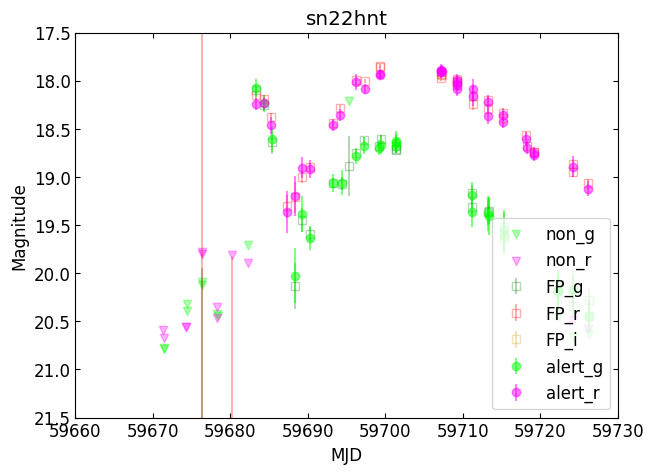

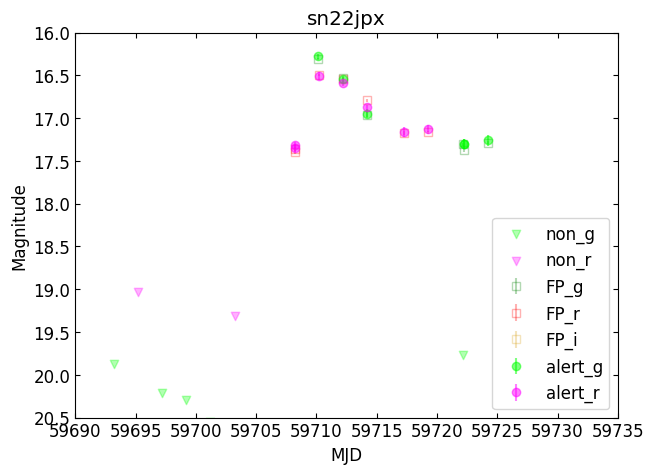

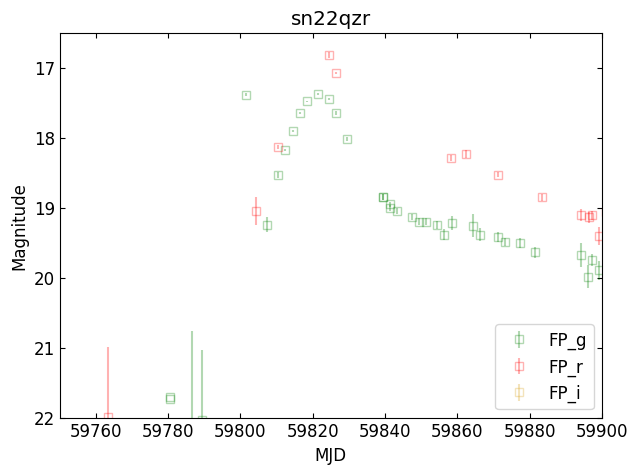

In [10]:
# PLOTTING FP AND ALERT DATA TOGETHER

%matplotlib inline
# %matplotlib qt

plot_fp_mag_LC(snztf18, _, _, ID='ztf18', alert=False, xlims=[58220, 58270], ylims=[21.0, 18.5])
plot_fp_mag_LC(sn19rwd, sn19rwd_a, sn19rwd_non, ID='sn19rwd', xlims=[58740, 58810], ylims=[20.5, 17.5])
plot_fp_mag_LC(sn20bio, _, _, ID='sn20bio', alert=False, xlims=[58860, 58920], ylims=[25.0, 16.5])
plot_fp_mag_LC(sn20ano, _, _,ID='sn20ano', alert=False, xlims=[58864.5, 58914.5], ylims=[25,18])
plot_fp_mag_LC(sn20ikq, _, _,ID='sn20ikq', alert=False, xlims=[58949.5, 59044.5], ylims=[25,17])
plot_fp_mag_LC(sn20rsc, _, _,ID='sn20rsc', alert=False, xlims=[59074.5, 59106.5], ylims=[25,19])
plot_fp_mag_LC(sn21gno, sn21gno_a, sn21gno_non, ID='sn21gno', xlims=[59260, 59340], ylims=[23, 16])
# too messy #plot_fp_mag_LC(sn21aezx,  _, _, ID='sn21aezx', alert=False)#, xlims=[58220, 58270], ylims=[21.0, 18.5])
plot_fp_mag_LC(sn21heh, sn21heh_a, sn21heh_non, ID='sn21heh', xlims=[59270, 59340], ylims=[21, 17])
plot_fp_mag_LC(sn21vgn, sn21vgn_a, sn21vgn_non, ID='sn21vgn', xlims=[59410, 59480], ylims=[21.5, 18])
plot_fp_mag_LC(sn22hnt, sn22hnt_a, sn22hnt_non, ID='sn22hnt', xlims=[59660, 59730], ylims=[21.5, 17.5])
plot_fp_mag_LC(sn22jpx, sn22jpx_a, sn22jpx_non, ID='sn22jpx', xlims=[59690, 59735], ylims=[20.5, 16.0])
plot_fp_mag_LC(sn22qzr, _, _, ID='sn22qzr', alert=False, xlims=[59750, 59900], ylims=[22.0, 16.5])

In [11]:
# def side_by_side(fp, ald, nond, ID='temp', alert=True, xlims_mjd=[0,0], xlims_jd=[0,0], ylims=[0,0], save=True):
#     plt.figure(figsize=(12,8))

#     plt.subplot(2, 1, 1)
#     #combined, t=[mjd]
#     plot_combo_LC(fp, ald, nond, ID=ID, alert=alert, xlims=[xlims_mjd[0], xlims_mjd[1]], ylims=[ylims[0], ylims[1]], new_fig=False, show=False, save=False)
        

#     plt.subplot(2, 2, 3)
#     #flux, t=[jd]
#     plot_LC(fp, col1='forcediffimflux', err='forcediffimfluxunc',ID=ID, xlimit=True, xlims=[xlims_jd[0], xlims_jd[1]], new_fig=False, save=False, show=False)
#     plt.ylabel('Flux')
#     plt.title(None)


#     plt.subplot(2, 2, 4)
#     #magnitude, t=[jd]
#     plot_LC(fp, col1='mag', err=_, ID=ID, xlimit=True, xlims=[xlims_jd[0], xlims_jd[1]], ylims=[ylims[0], ylims[1]], flux=False, new_fig=False, save=False, show=False)
#     plt.ylabel('Mag')
#     plt.title(None)

#     plt.tight_layout()
#     if save:
#         plt.savefig('./figures/fp/'+ID+'_sidebysidebyside.png')

In [12]:
#fp_list = [snztf18, sn19rwd, sn20bio, sn21aezx, sn21gno, sn21heh, sn21vgn, sn22hnt, sn22jpx, sn22qzr]
al_list = [_, sn19rwd_a, _, _,_,_, _, sn21gno_a, sn21heh_a, sn21vgn_a, sn22hnt_a, sn22jpx_a, _]
nd_list = [_, sn19rwd_non, _, _,_,_,_, sn21gno_non, sn21heh_non, sn21vgn_non, sn22hnt_non, sn22jpx_non, _]
alert_bools = [False, True, False, False, False, False, False, True, True, True, True, True, False]
ID_list = ['snztf18', 'sn19rwd', 'sn20bio', 'sn20ano', 'sn20ikq', 'sn20rsc',
           'sn21aezx', 'sn21gno', 'sn21heh', 'sn21vgn', 'sn22hnt', 'sn22jpx', 'sn22qzr']
xlims_mjd_ls = [[58220, 58270], [58740, 58810], [58860, 58920], [58864.5, 58914.5], [58949.5, 59044.5], [59074.5, 59106.5],
                [59514.5, 59569.5], [59279.5, 59319.5], [59270, 59340], [59410, 59480], [59660, 59730], [59690, 59735], [59750, 59900]]
xlims_jd_ls = [[20+2.4582e6, 55+2.4582e6], [755+2.458e6, 800+2.458e6], [2458860.5, 2458920.5], [865+2.458e6, 915+2.458e6], [-45+2.459e6, 20+2.459e6], [75+2.459e6, 107+2.459e6],
               [15+2.4595e6, 70+2.4595e6], [280+2.459e6, 320+2.459e6], [2459270.5, 2459340.5], [2459410.5, 2459480.5], [2459670.5, 2459730.5], [2459700.5, 2459740.5], [780+2.459e6, 875+2.459e6]]
ylims_ls = [[21.0, 18.5], [20.5, 17.5], [27.5, 12.5], [25,18], [25,17], [25,19],
            [23, 16], [24,16], [21, 17], [21.5, 18], [21.5, 17.5], [19.0, 16.0], [22.0, 16.0]]

In [13]:
# for i in range(len(fp_list)):
#     side_by_side(fp_list[i], al_list[i], nd_list[i], ID=ID_list[i], alert=alert_bools[i], xlims_mjd=xlims_mjd_ls[i], xlims_jd=xlims_jd_ls[i], ylims=ylims_ls[i], save=True)

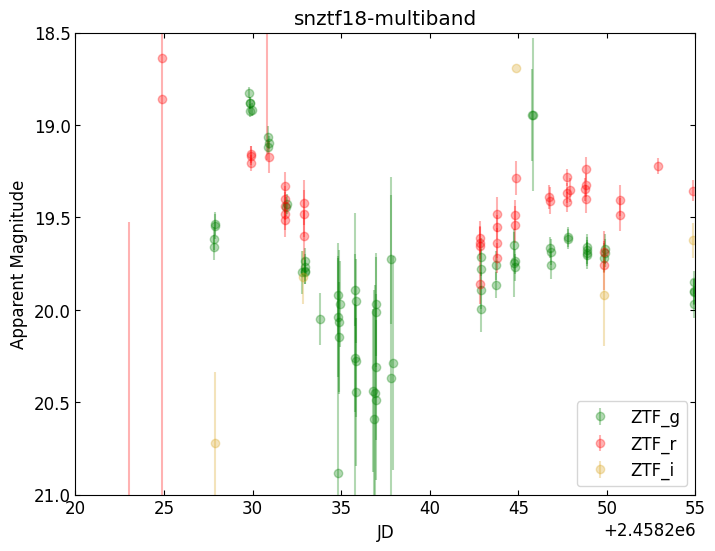

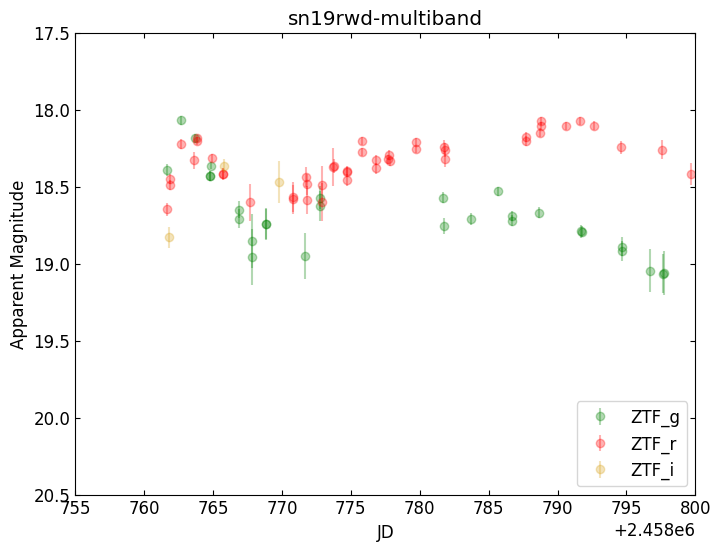

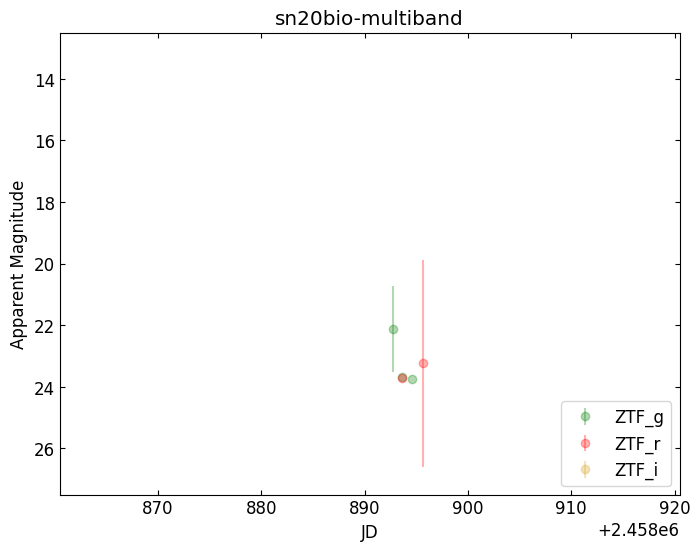

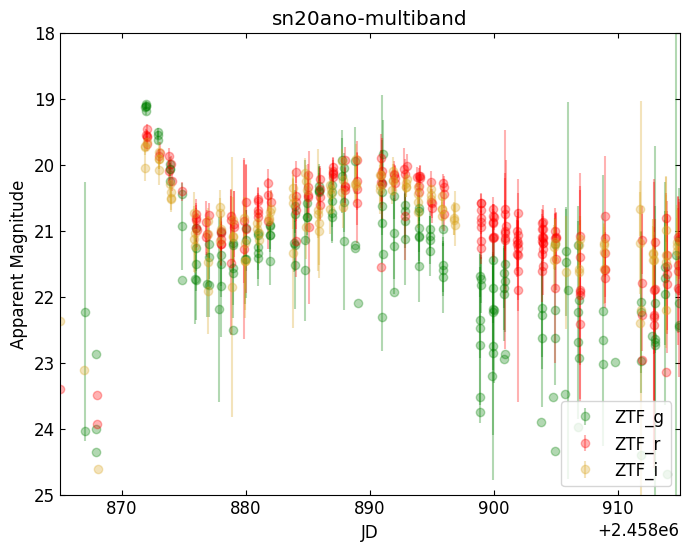

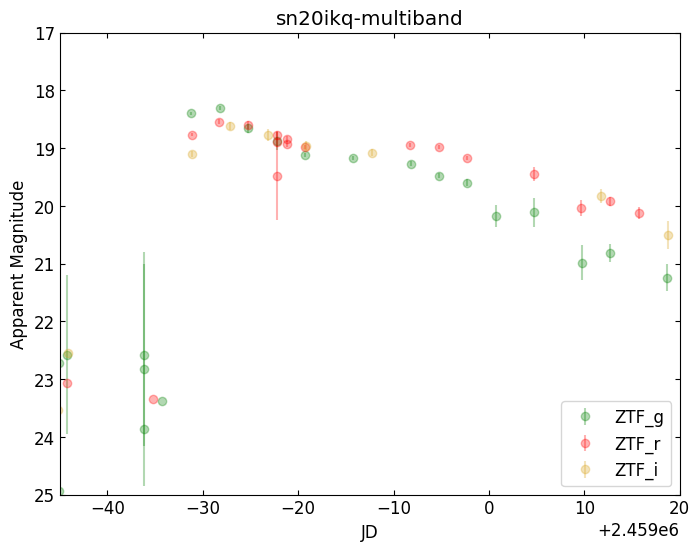

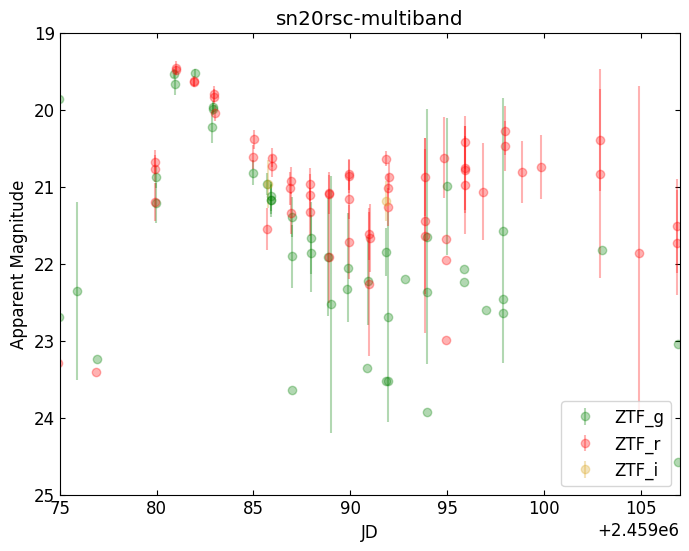

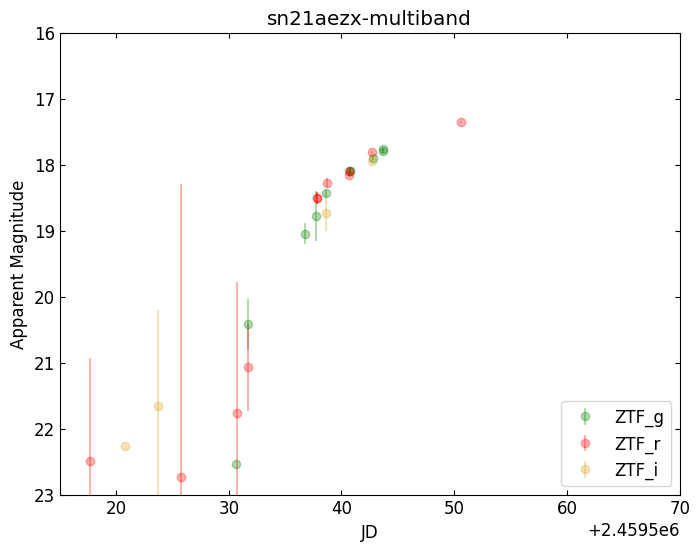

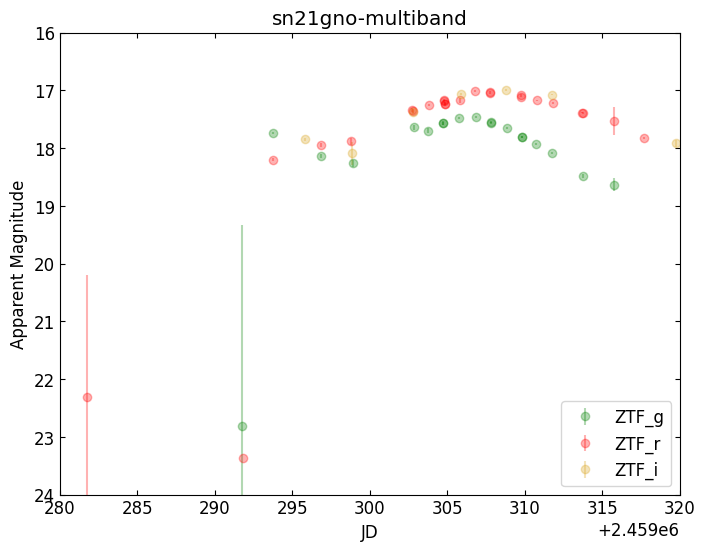

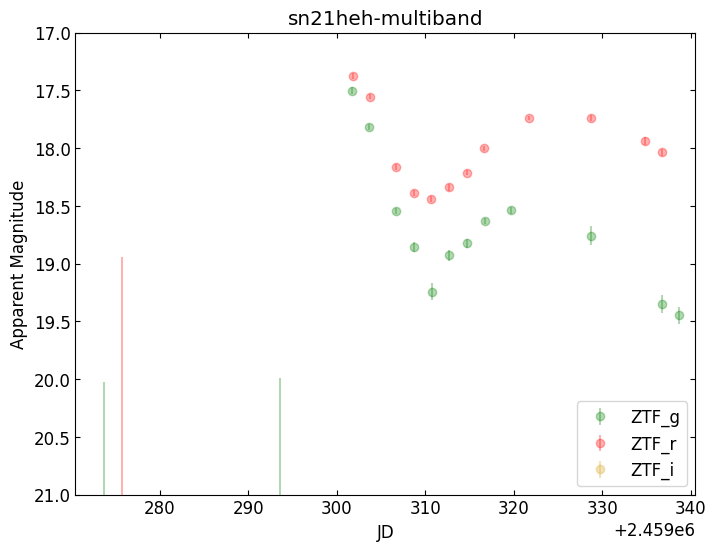

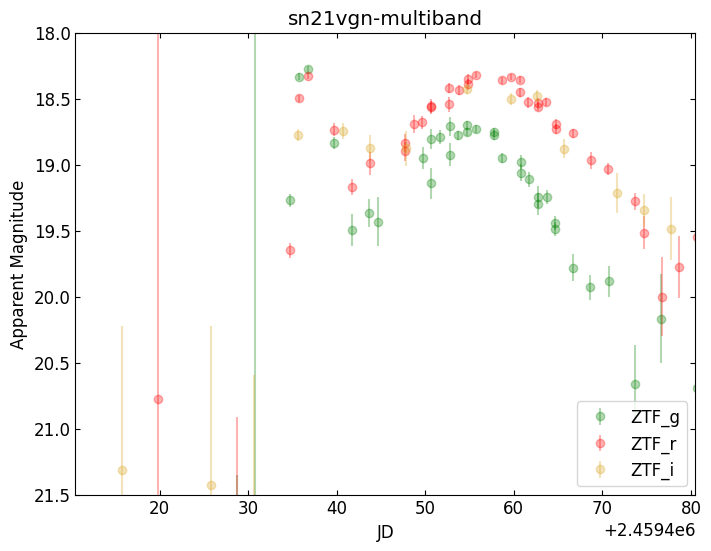

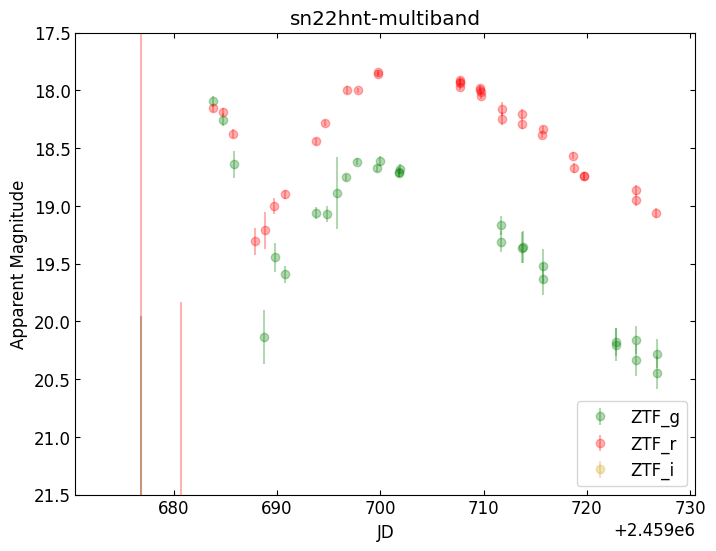

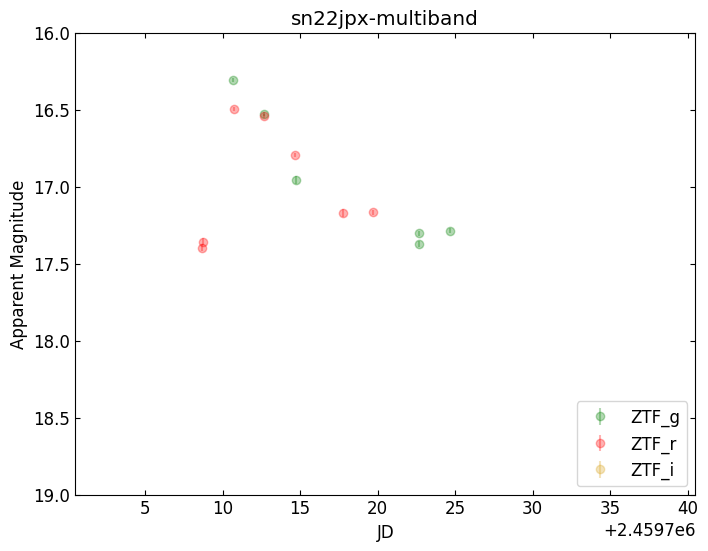

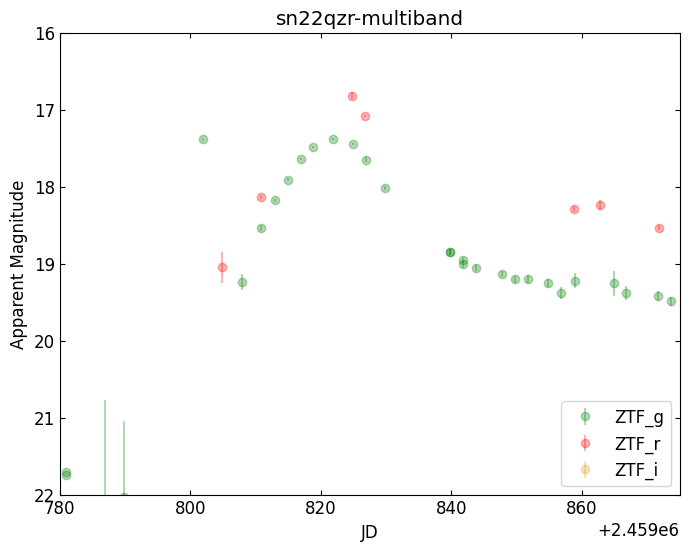

In [14]:
%matplotlib inline
# %matplotlib qt
for i in range(len(fp_list)):
    multi_band_plot(fp_list[i], as_list[i], at_list[i], ID=ID_list[i], xlims=xlims_jd_ls[i], ylims=ylims_ls[i],save=False, atlas=False, asassn=False)

In [16]:
# export_combined_df(snztf18, snztf18_at, SN_ID='snztf18')
# export_combined_df(sn19rwd, sn19rwd_at, SN_ID='sn19rwd')
# export_combined_df(sn20bio, sn20bio_at, SN_ID='sn20bio')
# export_combined_df(sn21aezx, sn21aezx_at, SN_ID='sn21aezx')
# export_combined_df(sn21gno, sn21gno_at, SN_ID='sn21gno')
# export_combined_df(sn21heh, sn21heh_at, SN_ID='sn21heh')
# export_combined_df(sn21vgn, sn21vgn_at, SN_ID='sn21vgn')
# export_combined_df(sn22hnt, sn22hnt_at, SN_ID='sn22hnt')
# export_combined_df(sn22jpx, sn22jpx_at, SN_ID='sn22jpx')
# export_combined_df(sn22qzr, sn22qzr_at, SN_ID='sn22qzr')
## added later
export_combined_df(sn20ano, sn20ano_at, SN_ID='sn20ano')
export_combined_df(sn20ikq, sn20ikq_at, SN_ID='sn20ikq')
export_combined_df(sn20rsc, sn20rsc_at, SN_ID='sn20rsc')

/Users/pnr5sh/Library/CloudStorage/OneDrive-Personal/Documents/PhD/ztf_IIb_gh/fp_plotting_funcs.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf_atlas_df['ztf_mag_lower'][ztf_atlas_df['data_origin']=='ztf'] = np.array(fp_df['mag_err_lower'])
/Users/pnr5sh/Library/CloudStorage/OneDrive-Personal/Documents/PhD/ztf_IIb_gh/fp_plotting_funcs.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ztf_atlas_df['ztf_mag_upper'][ztf_atlas_df['data_origin']=='ztf'] = np.array(fp_df['mag_err_upper'])
/Users/pnr5sh/Library/CloudStorage/OneDrive-Personal/Documents/PhD/ztf_IIb_gh/fp_plotting_funcs.py:102: SettingWithCopyWarni

In [ ]:
##############################
#    RESIDUAL FIDDLING
##############################

In [16]:
sn19rwd_merge = fp_alert_merge(sn19rwd, sn19rwd_a)
sn21gno_merge = fp_alert_merge(sn21gno, sn21gno_a)
sn21heh_merge = fp_alert_merge(sn21heh, sn21heh_a)
sn21vgn_merge = fp_alert_merge(sn21vgn, sn21vgn_a)
sn22hnt_merge = fp_alert_merge(sn22hnt, sn22hnt_a)
sn22jpx_merge = fp_alert_merge(sn22jpx, sn22jpx_a)

In [17]:
compare_mags(sn19rwd_merge)
compare_mags(sn21gno_merge)
compare_mags(sn21heh_merge)
compare_mags(sn21vgn_merge)
compare_mags(sn22hnt_merge)
compare_mags(sn22jpx_merge)

In [18]:
alert_IDs = ['sn19rwd', 'sn21gno', 'sn21heh', 'sn21vgn', 'sn22hnt', 'sn22jpx']
merge_dfs = [sn19rwd_merge, sn21gno_merge, sn21heh_merge, sn21vgn_merge, sn22hnt_merge, sn22jpx_merge]

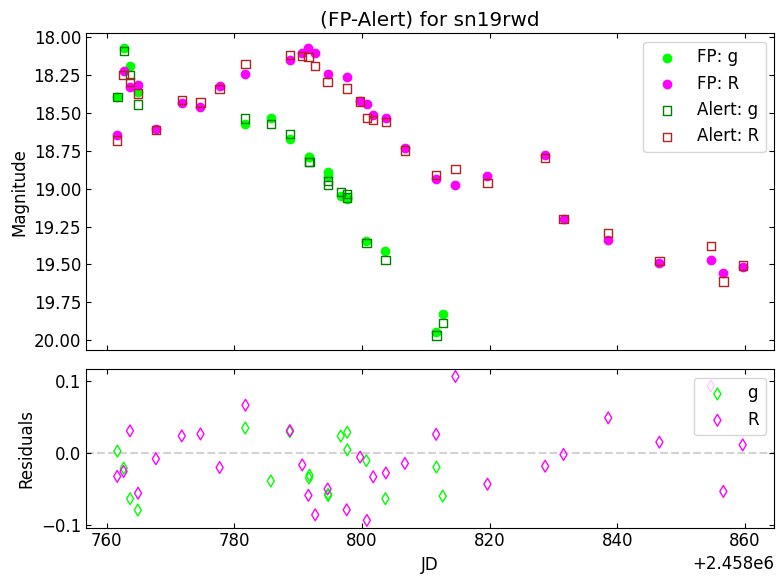

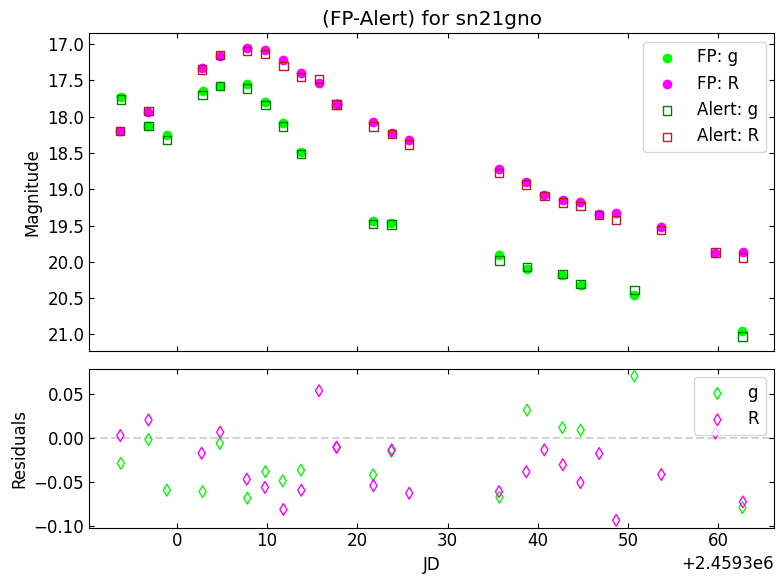

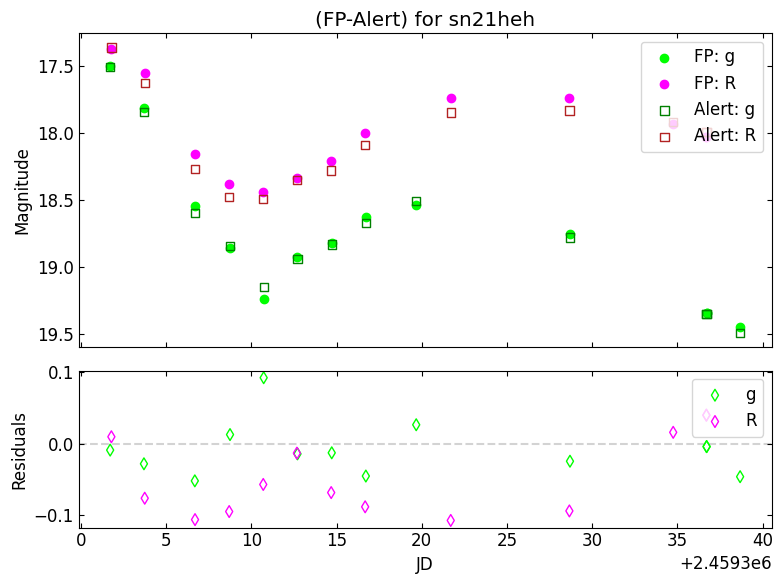

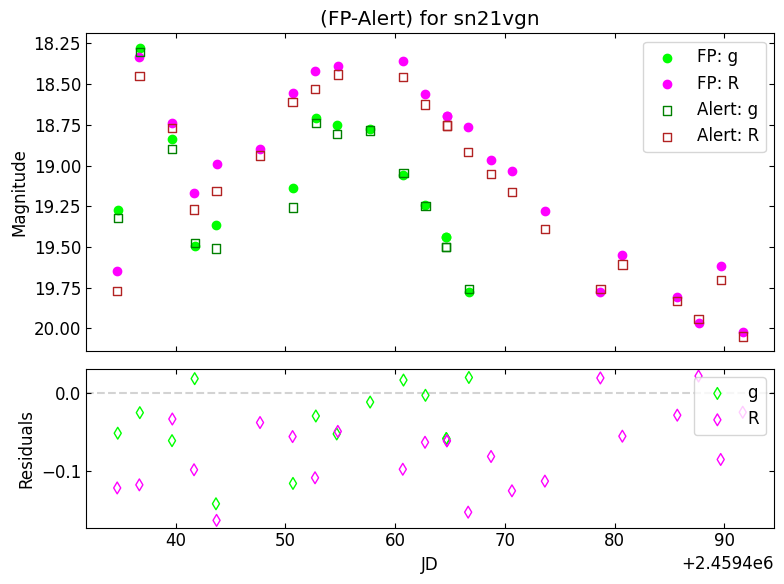

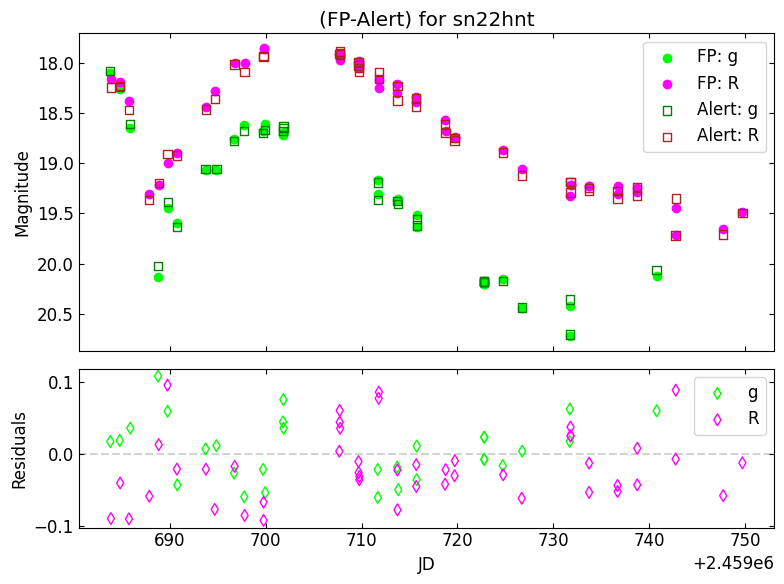

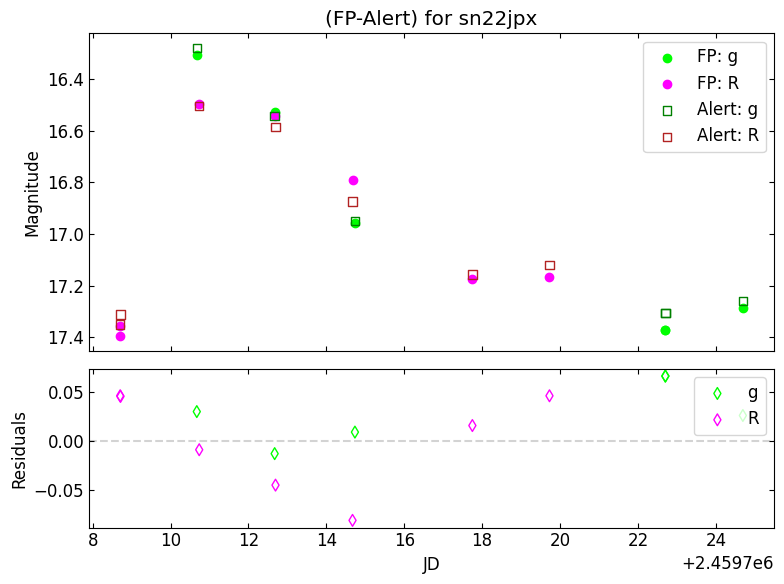

In [19]:
for i,df in enumerate(merge_dfs):
    plot_residuals(df, alert_IDs[i])

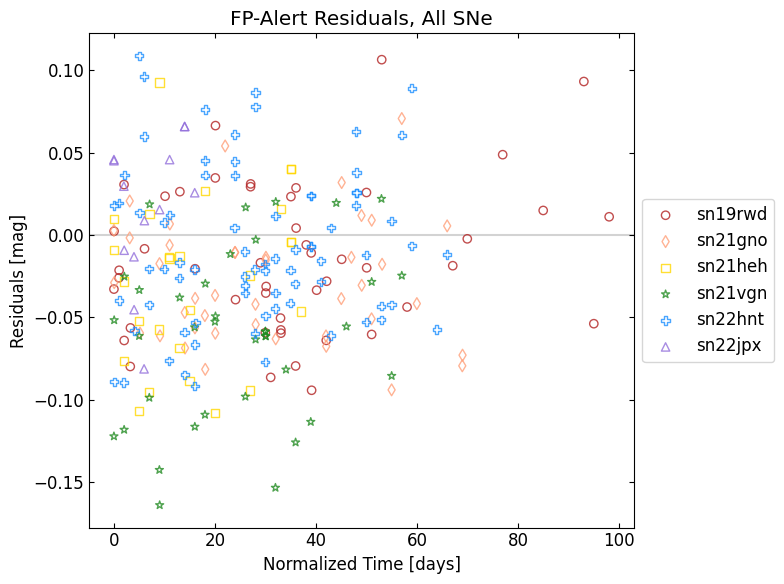

In [20]:
colors = ['firebrick', 'lightsalmon', 'gold', 'forestgreen', 'dodgerblue', 'mediumpurple']
markers = ['o', 'd', 's', '*', 'P', '^']

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111)

for i,df in enumerate(merge_dfs):
    t_norm = normalize_time(df)

    plt.scatter(t_norm, df['mag_diff_fp-alert'], facecolor='none', edgecolor=colors[i], alpha=0.8, marker=markers[i], label=alert_IDs[i])
    plt.xlabel('Normalized Time [days]')
    plt.ylabel('Residuals [mag]')
    plt.title('FP-Alert Residuals, All SNe')

plt.axhline(0, color='lightgray', zorder=0)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels[0:15], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('./figures/all_residuals.png')
